<a href="https://colab.research.google.com/github/n28neeraj/TImeSeries_Tutorial/blob/master/Prophet_on_Time_Series_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fbprophet import Prophet
# https://facebook.github.io/prophet/docs/quick_start.html
 
 
import pandas as pd
# https://pandas.pydata.org/docs/
 
import numpy as np
# https://numpy.org/doc/stable/about.html
 
from math import sqrt
# https://docs.python.org/3/library/math.html
from datetime import datetime
# https://docs.python.org/3/library/datetime.html
 
from matplotlib import pyplot as plt
# https://matplotlib.org/index.html
import seaborn as sns
# https://seaborn.pydata.org/
 
from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/getting_started.html
 
 
from scipy import stats
# https://docs.scipy.org/doc/scipy/reference/

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
# data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AirPassengers.csv')


In [ ]:
data = pd.read_csv('AirPassengers.csv')

In [ ]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [ ]:
data['Month'] = pd.DatetimeIndex(data['Month'])
data.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [ ]:
data = data.rename(columns={'Month': 'ds', '#Passengers': 'y'})

data.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


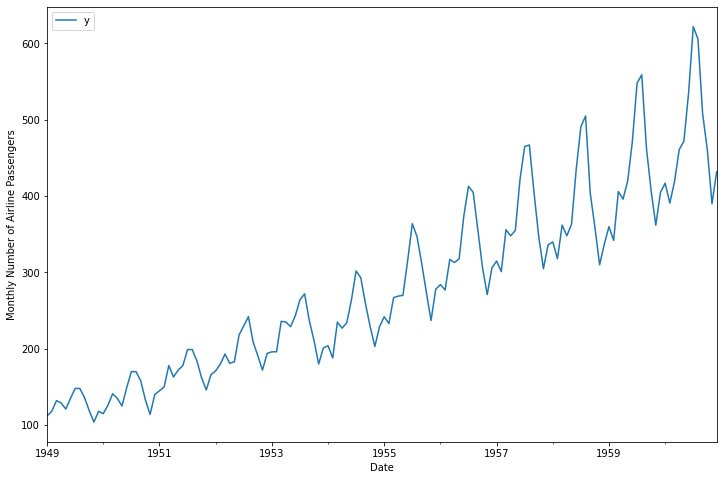

In [ ]:
ax = data.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [ ]:
trainLen = 108
train = data[:trainLen]
test = data[trainLen:]

In [ ]:
my_model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
139,1960-08-01
140,1960-09-01
141,1960-10-01
142,1960-11-01
143,1960-12-01


In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
139,1960-08-01,547.347790,515.182964,576.771202
140,1960-09-01,510.625969,478.954670,539.943949
141,1960-10-01,479.773547,449.063708,509.522904
142,1960-11-01,454.387200,423.880658,485.176360
143,1960-12-01,481.238389,452.222270,511.538266


In [ ]:
predicted = forecast['yhat'][108:]

In [ ]:
error = sqrt(mean_squared_error(test['y'], predicted))
print('Test RMSE: %.3f' % error)

Test RMSE: 44.567


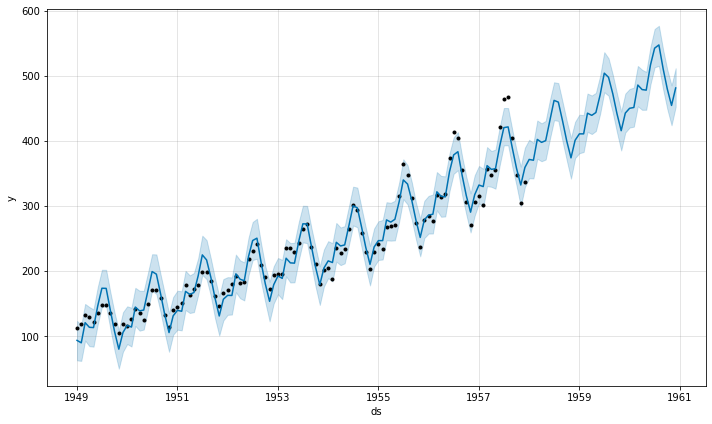

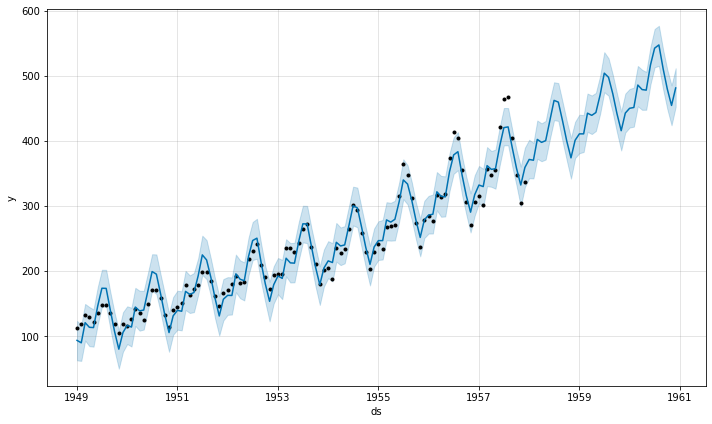

In [ ]:
my_model.plot(forecast, uncertainty=True)